Daten einlesen

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Schon am Anfang beginnen die ersten Probleme aufzutauchen, denn wie wir wissen fehlen gewisse Daten in der Datenstruktur. Um die möglichkeit frei zu behalten zu einem späteren Zeitpunkt fehlender Werte zu ergänzen oder zu filtern haben wir uns für die funktion `genfromtxt` entschieden, denn diese ermöglicht es uns fehlende Werte zu filtern oder zu ergänzen 

In einem nächsten Schritt werden die explizite Daten der Wetterstation in **Bern** gefiltert. 

In [312]:
# Hier hat man genfromtxt() benutzt, um die Daten aus der CSV-Datei zu laden.
data = np.genfromtxt("Bern21-22.csv", delimiter=';', skip_header=1, dtype=str)
stn, time, luftdruck, temp, regen, sonne, time_diff = data.T

def daten_filtern(datenset):
    ber_data = data[np.char.startswith(data[:,0], "BER")]
    return ber_data

def daten_bereinigen(datenset):
    bereinigte_daten = np.delete(datenset, [0, 1], axis=1)
    return bereinigte_daten
print(luftdruck)
clean_data = daten_bereinigen(daten_filtern(data))

# shape und len() der Arrays ausgeben
print(f" Der ursprüngliche Datensatz betägt {data.shape}, {clean_data.shape}")
print(len(data),len(clean_data))

# Die ersten 5 Zeilen ausgeben
print(clean_data[:5])

['859.0' '858.6' '858.2' ... '957.1' '957.4' '957.7']
 Der ursprüngliche Datensatz betägt (52324, 7), (7464, 5)
52324 7464
[['941.4' '7.2' '0.0' '0.0' '0.0']
 ['941.4' '7.5' '0.0' '0.0' '1.0']
 ['941.1' '8.3' '0.7' '0.0' '2.0']
 ['941.3' '9.6' '1.0' '0.0' '4.0']
 ['942.2' '9.6' '1.7' '0.0' '6.0']]


Eine reduktion von **52'324** auf **7464** Daten kann nach diesem Prozess beobachtet werden. Trotz der gefilterten Daten bleibt  die Zeilenanzahl enthalten. 


Jedoch wollen wir ersteinmal wissen, wieviele Daten, dass überhaupt fehlen, damit wir uns ein Bild machen können. Wir wissen, dass die Wetterdaten über ein Jahr gesammelt worden sind und dass ein Tag aus 24h besteht. 

In [313]:
datensätze = 365 * 24
unsere_datensätze = len(clean_data)
print(f"Es fehlen insgesammt {datensätze - unsere_datensätze} Datensätze")

Es fehlen insgesammt 1296 Datensätze


In [302]:
luftdruck = clean_data[:, 0]
temperaturen = clean_data[:, 1]
regen = clean_data[:, 2]
sonne = clean_data[:, 3]
time_diff = clean_data[:, 4]


luftdruck = luftdruck.astype(float)
temp = temperaturen.astype(float)
regen = regen.astype(float)
sonne = sonne.astype(float)
messbeginn = time_diff.astype(float)


In [303]:
def daten_aufteilen(daten):
    luftdruck = daten[:, 0].astype(float)
    temperaturen = daten[:, 1].astype(float)
    regen = daten[:, 2].astype(float)
    sonne = daten[:, 3].astype(float)
    time_diff = daten[:, 4].astype(np.float64)
    
    return luftdruck, temperaturen, regen, sonne, time_diff


In [304]:
clean_data = daten_bereinigen(daten_filtern(data))
luftdruck, temperaturen, regen, sonne, messbeginn = daten_aufteilen(clean_data)


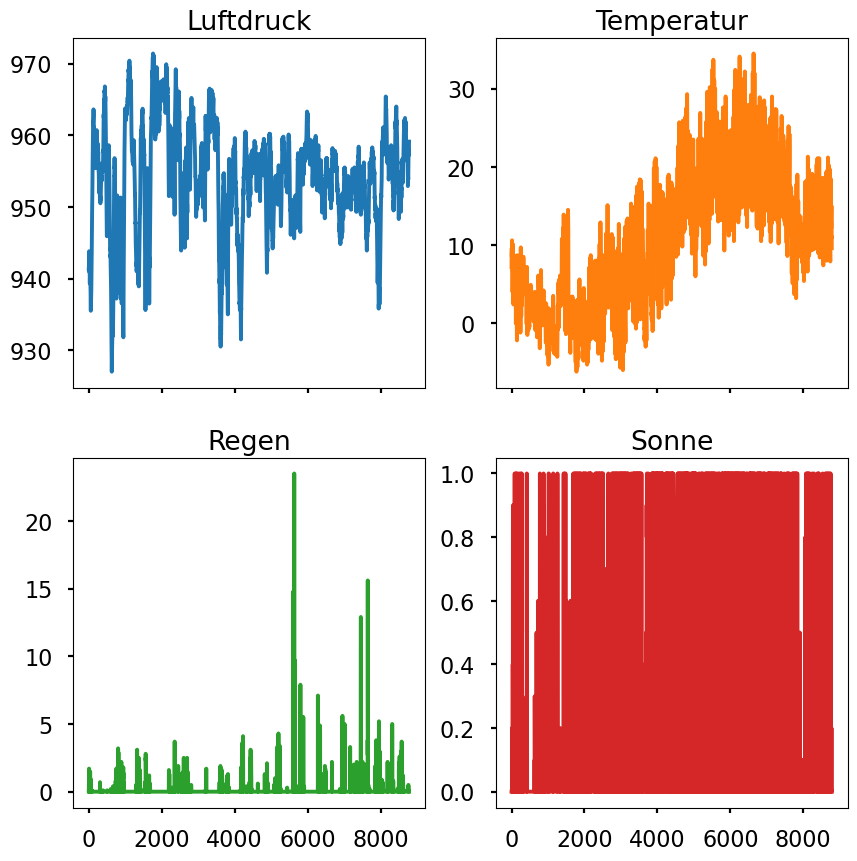

In [305]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs[0, 0].plot(messbeginn, luftdruck)
axs[0, 0].set_title('Luftdruck')
axs[0, 1].plot(messbeginn, temperaturen, 'tab:orange')
axs[0, 1].set_title('Temperatur')   
axs[1, 0].plot(messbeginn, regen, 'tab:green')
axs[1, 0].set_title('Regen')
axs[1, 1].plot(messbeginn, sonne, 'tab:red')
axs[1, 1].set_title('Sonne')
plt.show()


# interpolation 

In [306]:
x_data = temp
y_data = messbeginn
print(len(x_data))
print(len(y_data))

7464
7464


In [307]:
def lin_interp(x):
    n = len(x_data)
    i_upper = np.searchsorted(x_data, x)
    i_upper = np.where(i_upper < n, i_upper, n - 1)
    i_upper = np.where(i_upper > 1, i_upper, 1)
    i_lower = i_upper - 1
    x_upper = x_data[i_upper]
    y_upper = y_data[i_upper]
    x_lower = x_data[i_lower]
    y_lower = y_data[i_lower]
    return (y_upper - y_lower) / (x_upper - x_lower) * (x - x_lower) + y_lower

In diesem Code werden zunächst die eindeutigen Luftdruckwerte mit der np.unique()-Funktion und die entsprechenden y-Werte basierend auf den eindeutigen Indizes in messbeginn extrahiert. Dann wird die Interpolation wie zuvor durchgeführt, aber mit unique_luftdruck und unique_messbeginn. Der restliche Code bleibt unverändert.

Hinweis: Wenn die Daten sehr stark schwanken oder unregelmäßig sind, kann es sinnvoll sein, die Interpolationsmethode anzupassen oder die Daten zu glätten, bevor Sie die Interpolation durchführen.

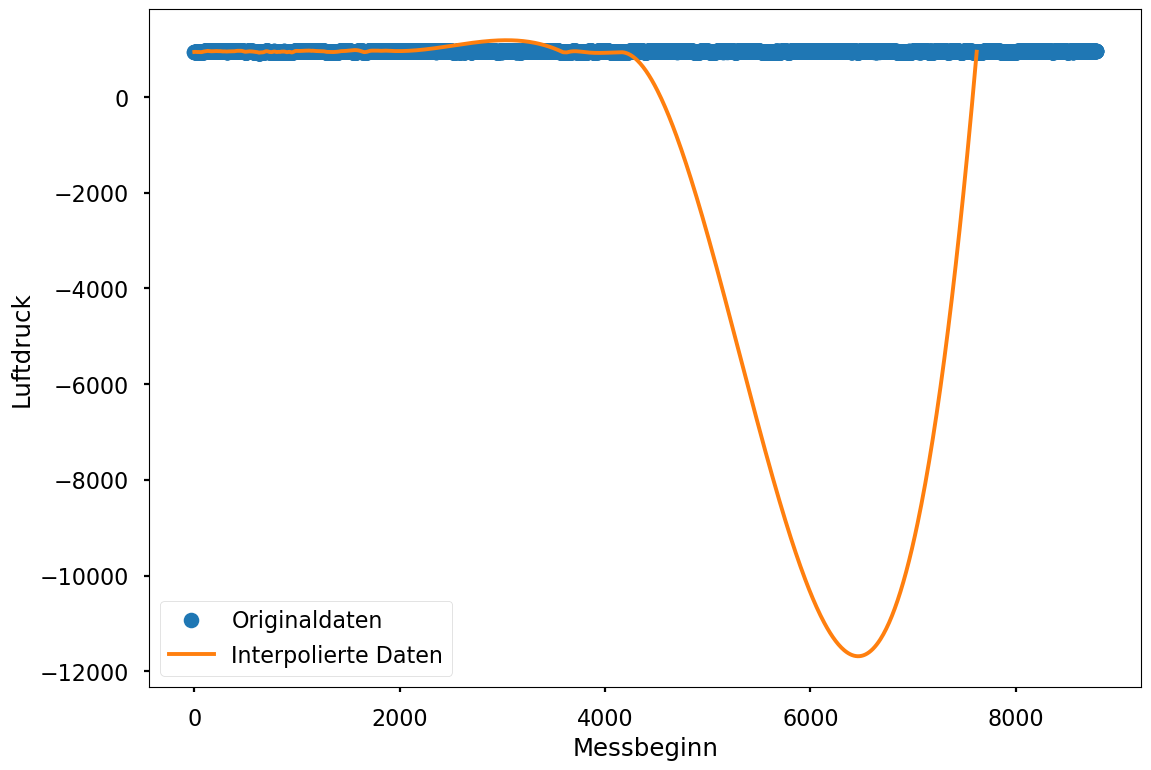

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Beispiel-Daten
luftdruck = np.array(luftdruck)
messbeginn = np.array(messbeginn)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]


# Interpolationsfunktion
interp_func = interp1d(unique_messbeginn, unique_luftdruck, kind='cubic')


# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_messbeginn), np.max(unique_messbeginn), num=len(unique_messbeginn)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten
plt.plot(messbeginn, luftdruck, 'o', label='Originaldaten')
plt.plot(x_interp, y_interp, label='Interpolierte Daten')
plt.xlabel('Messbeginn')
plt.ylabel('Luftdruck')
plt.legend()
plt.show()


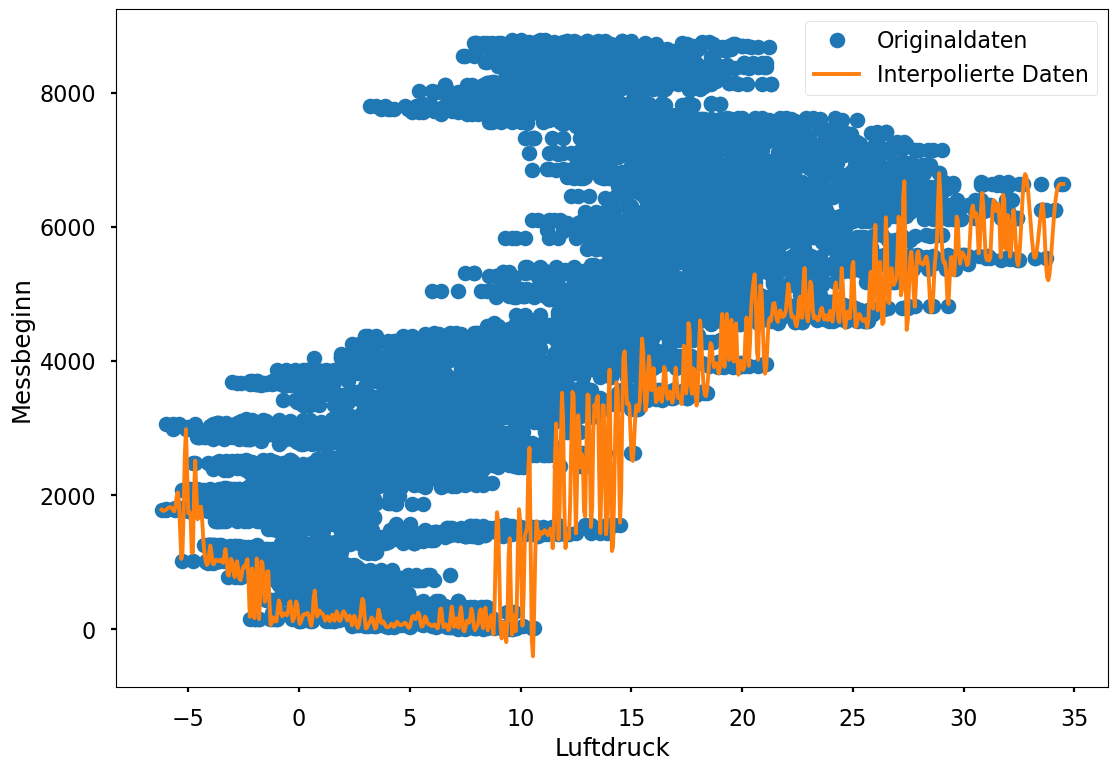

In [309]:
luftdruck = np.array(x_data)
messbeginn = np.array(y_data)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]

# Interpolationsfunktion
interp_func = interp1d(unique_luftdruck, unique_messbeginn, kind='cubic')

# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_luftdruck), np.max(unique_luftdruck), num=len(unique_luftdruck)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten
plt.plot(luftdruck, messbeginn, 'o', label='Originaldaten')
plt.plot(x_interp, y_interp, label='Interpolierte Daten')
plt.xlabel('Luftdruck')
plt.ylabel('Messbeginn')
plt.legend()
plt.show()


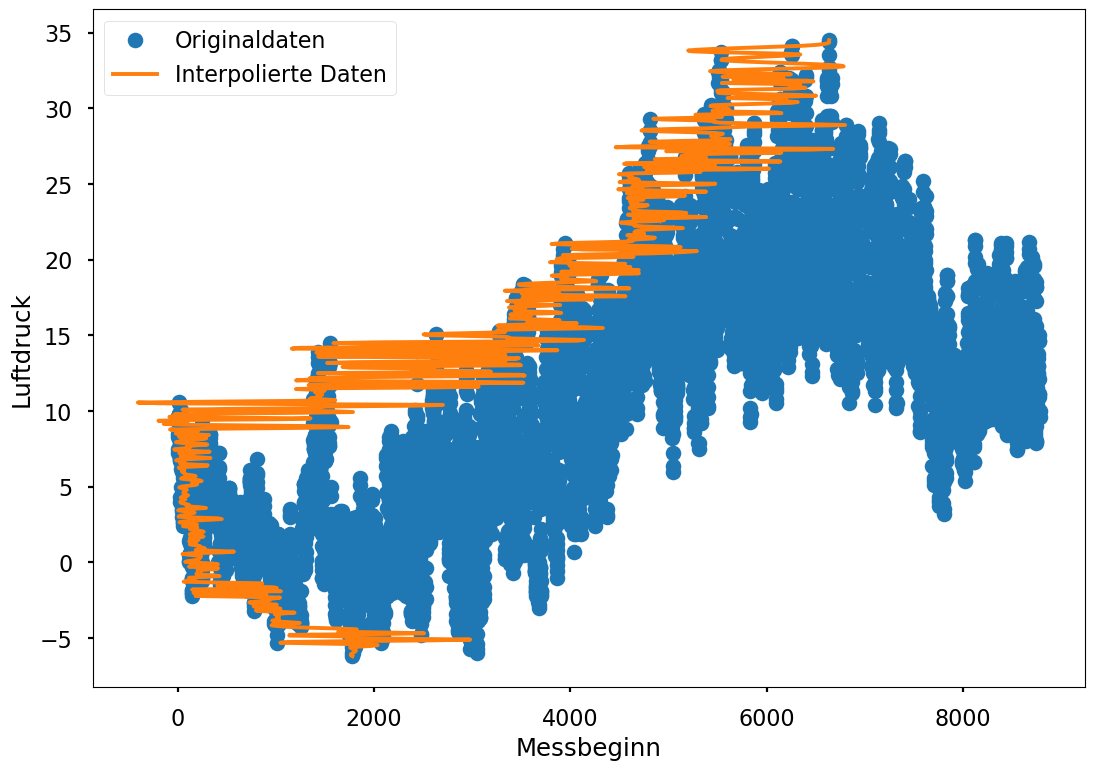

In [310]:
luftdruck = np.array(luftdruck)
messbeginn = np.array(messbeginn)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]

# Interpolationsfunktion
interp_func = interp1d(unique_luftdruck, unique_messbeginn, kind='cubic')

# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_luftdruck), np.max(unique_luftdruck), num=len(unique_luftdruck)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten mit getauschten Achsen
fig, ax = plt.subplots()
ax.plot(messbeginn, luftdruck, 'o', label='Originaldaten')
ax.plot(y_interp, x_interp, label='Interpolierte Daten')
ax.set_xlabel('Messbeginn')
ax.set_ylabel('Luftdruck')
ax.legend()
plt.show()
